In [85]:
import pandas as pd
import re 
import matplotlib_inline as plt
import seaborn as sns

In [86]:
data = pd.read_csv('ScrapedData/cars_data.csv')
data2 = pd.read_csv('ScrapedData/cars_data2.csv')
data3 = pd.read_csv('ScrapedData/cars_data3.csv')
data.head()

,car_name,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,Used BMW 7 Series 730Li 2018,2018,"34,770KM",Automatic,Petrol,Silver,4.0,1998.0,\n Rear Wheel Drive\n,4,Perfect inside out,"190,000"
1,Used Infiniti QX80 5.6L Luxe (8 Seats) 2020,2020,"38,928KM",Automatic,Petrol,White,5.0,5552.0,\n All Wheel Drive\n,8,Perfect inside out,"228,350"
2,Used Chevrolet Suburban 5.3L LS 2WD 2018,2018,"36,827KM",Automatic,Petrol,Black,5.0,5300.0,\n Rear Wheel Drive\n,8,Perfect inside out,"135,575"
3,Used Chevrolet Silverado 2016,2016,"142,731KM",Automatic,Petrol,White,2.0,5300.0,\n All Wheel Drive\n,8,Perfect inside out,"64,450"
4,Used GMC Yukon 5.3L SLE (2WD) 2018,2018,"79,504KM",Automatic,Petrol,Gray,5.0,5328.0,\n Rear Wheel Drive\n,8,Perfect inside out,"145,350"


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5855 entries, 0 to 5854
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_name          5855 non-null   object 
 1   model_year        5855 non-null   int64  
 2   km                5855 non-null   object 
 3   transmission      3249 non-null   object 
 4   fuel              695 non-null    object 
 5   color             4923 non-null   object 
 6   no_doors          678 non-null    float64
 7   engine_capacity   617 non-null    float64
 8   drive_type        5855 non-null   object 
 9   no_cylinders      3268 non-null   object 
 10  Accident_history  3303 non-null   object 
 11  price             5855 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 549.0+ KB


In [88]:
# Concatenating 3 datasets 
cars = pd.concat([data,data2,data3])
cars

,car_name,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,Used BMW 7 Series 730Li 2018,2018,"34,770KM",Automatic,Petrol,Silver,4.0,1998.0,\n Rear Wheel Drive\n,4,Perfect inside out,"190,000"
1,Used Infiniti QX80 5.6L Luxe (8 Seats) 2020,2020,"38,928KM",Automatic,Petrol,White,5.0,5552.0,\n All Wheel Drive\n,8,Perfect inside out,"228,350"
2,Used Chevrolet Suburban 5.3L LS 2WD 2018,2018,"36,827KM",Automatic,Petrol,Black,5.0,5300.0,\n Rear Wheel Drive\n,8,Perfect inside out,"135,575"
3,Used Chevrolet Silverado 2016,2016,"142,731KM",Automatic,Petrol,White,2.0,5300.0,\n All Wheel Drive\n,8,Perfect inside out,"64,450"
4,Used GMC Yukon 5.3L SLE (2WD) 2018,2018,"79,504KM",Automatic,Petrol,Gray,5.0,5328.0,\n Rear Wheel Drive\n,8,Perfect inside out,"145,350"
...,...,...,...,...,...,...,...,...,...,...,...,...
1055,Used Toyota Fortuner 2021,2021,"10,000KM",Automatic,NaN,White,NaN,NaN,\n Drive\n,4,NaN,"120,000"
1056,Used Land Rover Range Rover 2012,2012,"176,000KM",Automatic,NaN,Silver,NaN,NaN,\n Drive\n,8,NaN,"90,000"
1057,Used Volkswagen CC 2014,2014,"147,000KM",Automatic,NaN,Black,NaN,NaN,\n Drive\n,4,NaN,"40,000"
1058,Used Fiat 500 2012,2012,"128,000KM",Automatic,NaN,White,NaN,NaN,\n Drive\n,4,NaN,"28,500"


In [89]:
cars.to_csv(r'cars.csv', index = False, header=True)

In [90]:
cars.duplicated().sum()

3593

In [91]:
# Removing duplicates
cars.drop_duplicates(inplace=True)
cars.duplicated().sum()

0

In [92]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5122 entries, 0 to 1059
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_name          5122 non-null   object 
 1   model_year        5122 non-null   int64  
 2   km                5122 non-null   object 
 3   transmission      3219 non-null   object 
 4   fuel              662 non-null    object 
 5   color             4189 non-null   object 
 6   no_doors          646 non-null    float64
 7   engine_capacity   586 non-null    float64
 8   drive_type        5122 non-null   object 
 9   no_cylinders      3238 non-null   object 
 10  Accident_history  2567 non-null   object 
 11  price             5122 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 520.2+ KB


In [93]:
cars.reset_index(inplace=True)
cars.drop(columns=['index'], inplace = True)

### Renaming values in car_name, km, drive_type and price 

#### Car_name

In [94]:
cars.car_name

0                      Used BMW 7 Series  730Li 2018
1       Used Infiniti QX80  5.6L Luxe (8 Seats) 2020
2          Used Chevrolet Suburban  5.3L LS 2WD 2018
3                      Used Chevrolet Silverado 2016
4                Used GMC Yukon  5.3L SLE (2WD) 2018
                            ...                     
5117                              Used Fiat 500 2012
5118                Used Land Rover Range Rover 2019
5119             Used Toyota Land Cruiser Prado 2015
5120                        Used Hyundai Accent 2019
5121    Used Toyota Corolla  1.6L XLI Executive 2006
Name: car_name, Length: 5122, dtype: object

In [95]:
# Removing 'used' and 'year' from car_name
cars.car_name = cars.car_name.apply(lambda x: x[4:-4])

In [96]:
# Splitting car_name into make and model
tmp = cars["car_name"].str.split(" ", n = 2, expand = True)
tmp

,0,1,2
0,,BMW,7 Series 730Li
1,,Infiniti,QX80 5.6L Luxe (8 Seats)
2,,Chevrolet,Suburban 5.3L LS 2WD
3,,Chevrolet,Silverado
4,,GMC,Yukon 5.3L SLE (2WD)
...,...,...,...
5117,,Fiat,500
5118,,Land,Rover Range Rover
5119,,Toyota,Land Cruiser Prado
5120,,Hyundai,Accent


In [97]:
tmp.rename(columns = {1:'car_make', 2:'car_model'}, inplace = True)
tmp.drop(columns=0)

,car_make,car_model
0,BMW,7 Series 730Li
1,Infiniti,QX80 5.6L Luxe (8 Seats)
2,Chevrolet,Suburban 5.3L LS 2WD
3,Chevrolet,Silverado
4,GMC,Yukon 5.3L SLE (2WD)
...,...,...
5117,Fiat,500
5118,Land,Rover Range Rover
5119,Toyota,Land Cruiser Prado
5120,Hyundai,Accent


In [98]:
cars = cars.join(tmp)


In [99]:
cars.drop(columns=['car_name', 0], inplace=True)

In [100]:
# Changing position of columns
temp_cols=cars.columns.tolist()
new_cols=temp_cols[-2:] + temp_cols[:-2]
cars=cars[new_cols]
cars.head()

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,BMW,7 Series 730Li,2018,"34,770KM",Automatic,Petrol,Silver,4.0,1998.0,\n Rear Wheel Drive\n,4,Perfect inside out,"190,000"
1,Infiniti,QX80 5.6L Luxe (8 Seats),2020,"38,928KM",Automatic,Petrol,White,5.0,5552.0,\n All Wheel Drive\n,8,Perfect inside out,"228,350"
2,Chevrolet,Suburban 5.3L LS 2WD,2018,"36,827KM",Automatic,Petrol,Black,5.0,5300.0,\n Rear Wheel Drive\n,8,Perfect inside out,"135,575"
3,Chevrolet,Silverado,2016,"142,731KM",Automatic,Petrol,White,2.0,5300.0,\n All Wheel Drive\n,8,Perfect inside out,"64,450"
4,GMC,Yukon 5.3L SLE (2WD),2018,"79,504KM",Automatic,Petrol,Gray,5.0,5328.0,\n Rear Wheel Drive\n,8,Perfect inside out,"145,350"


In [101]:
# removing unwanted values from car_name(leaving only first 3 words)
cars['car_model'] = cars.car_model.apply(lambda x: x.split())
cars['car_model'] = cars.car_model.apply(lambda x: x[0:1])
cars['car_model'] = cars.car_model.apply(lambda x: " ".join(x))

In [102]:
cars.head() 

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,BMW,7,2018,"34,770KM",Automatic,Petrol,Silver,4.0,1998.0,\n Rear Wheel Drive\n,4,Perfect inside out,"190,000"
1,Infiniti,QX80,2020,"38,928KM",Automatic,Petrol,White,5.0,5552.0,\n All Wheel Drive\n,8,Perfect inside out,"228,350"
2,Chevrolet,Suburban,2018,"36,827KM",Automatic,Petrol,Black,5.0,5300.0,\n Rear Wheel Drive\n,8,Perfect inside out,"135,575"
3,Chevrolet,Silverado,2016,"142,731KM",Automatic,Petrol,White,2.0,5300.0,\n All Wheel Drive\n,8,Perfect inside out,"64,450"
4,GMC,Yukon,2018,"79,504KM",Automatic,Petrol,Gray,5.0,5328.0,\n Rear Wheel Drive\n,8,Perfect inside out,"145,350"


In [103]:
print(cars['car_make'].value_counts().to_string())

Toyota           1627
Hyundai           907
Ford              309
Kia               280
Chevrolet         249
Nissan            167
Mercedes-Benz     157
Lexus             148
BMW               141
Honda             112
GMC               111
Mazda              99
Dodge              96
Jeep               69
Audi               63
Mitsubishi         59
Land               51
Porsche            41
Renault            40
Infiniti           34
Cadillac           33
Chrysler           31
Volkswagen         30
Changan            29
MG                 26
Haval              22
Genesis            16
Jaguar             15
Geely              14
Isuzu              12
Suzuki             10
Lincoln             8
Peugeot             7
Fiat                7
GAC                 7
Daihatsu            6
Bentley             5
Maserati            5
Mini                5
Santa               4
RAM                 4
Jetour              3
T60                 3
Hummer              3
Arrizo              2
X35       

In [104]:
# Renaming wrong/missing values in car_name
cars['car_make'] = cars['car_make'].str.replace('Land','Land Rover', regex=True) 
cars['car_make'] = cars['car_make'].str.replace('Camry','Toyota', regex=True) 
cars['car_make'] = cars['car_make'].str.replace('CS85','Changan', regex=True)
cars['car_make'] = cars['car_make'].str.replace('Rav4','Toyota', regex=True) 
cars['car_make'] = cars['car_make'].str.replace('Hilux','Toyota', regex=True)
cars['car_make'] = cars['car_make'].str.replace('Highlander','Toyota', regex=True)
cars['car_make'] = cars['car_make'].str.replace('Yukon','GMC', regex=True)
cars['car_make'] = cars['car_make'].str.replace('Sonata','Hyundai', regex=True)
cars['car_make'] = cars['car_make'].str.replace('Accent','Hyundai', regex=True)
cars['car_make'] = cars['car_make'].str.replace('Azera','Hyundai', regex=True)

In [105]:
# removing car_make with value count less than 5 
cars = cars.groupby('car_make').filter(lambda x : len(x)>4)
cars['car_make'].value_counts()

Toyota           1635
Hyundai           910
Ford              309
Kia               280
Chevrolet         249
Nissan            167
Mercedes-Benz     157
Lexus             148
BMW               141
GMC               112
Honda             112
Mazda              99
Dodge              96
Jeep               69
Audi               63
Mitsubishi         59
Land Rover         51
Porsche            41
Renault            40
Infiniti           34
Cadillac           33
Changan            31
Chrysler           31
Volkswagen         30
MG                 26
Haval              22
Genesis            16
Jaguar             15
Geely              14
Isuzu              12
Suzuki             10
Lincoln             8
GAC                 7
Fiat                7
Peugeot             7
Daihatsu            6
Mini                5
Maserati            5
Bentley             5
Name: car_make, dtype: int64

### km column

In [106]:
cars['km'] = cars.km.apply(lambda x: int(re.sub("[^z0-9]","",x)))
cars['km'].head()

0     34770
1     38928
2     36827
3    142731
4     79504
Name: km, dtype: int64

### drive_type column

In [107]:
cars['drive_type'] = cars.drive_type.apply(lambda x: x.replace("\n", ""))
cars.head()

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,BMW,7,2018,34770,Automatic,Petrol,Silver,4.0,1998.0,Rear Wheel Drive,4,Perfect inside out,"190,000"
1,Infiniti,QX80,2020,38928,Automatic,Petrol,White,5.0,5552.0,All Wheel Drive,8,Perfect inside out,"228,350"
2,Chevrolet,Suburban,2018,36827,Automatic,Petrol,Black,5.0,5300.0,Rear Wheel Drive,8,Perfect inside out,"135,575"
3,Chevrolet,Silverado,2016,142731,Automatic,Petrol,White,2.0,5300.0,All Wheel Drive,8,Perfect inside out,"64,450"
4,GMC,Yukon,2018,79504,Automatic,Petrol,Gray,5.0,5328.0,Rear Wheel Drive,8,Perfect inside out,"145,350"


### Price column

In [108]:
cars['price'] = cars.price.apply(lambda x: int(re.sub("[^z0-9]","",x)))
cars.head()

,car_make,car_model,model_year,km,transmission,fuel,color,no_doors,engine_capacity,drive_type,no_cylinders,Accident_history,price
0,BMW,7,2018,34770,Automatic,Petrol,Silver,4.0,1998.0,Rear Wheel Drive,4,Perfect inside out,190000
1,Infiniti,QX80,2020,38928,Automatic,Petrol,White,5.0,5552.0,All Wheel Drive,8,Perfect inside out,228350
2,Chevrolet,Suburban,2018,36827,Automatic,Petrol,Black,5.0,5300.0,Rear Wheel Drive,8,Perfect inside out,135575
3,Chevrolet,Silverado,2016,142731,Automatic,Petrol,White,2.0,5300.0,All Wheel Drive,8,Perfect inside out,64450
4,GMC,Yukon,2018,79504,Automatic,Petrol,Gray,5.0,5328.0,Rear Wheel Drive,8,Perfect inside out,145350


In [109]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5121
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_make          5062 non-null   object 
 1   car_model         5062 non-null   object 
 2   model_year        5062 non-null   int64  
 3   km                5062 non-null   int64  
 4   transmission      3191 non-null   object 
 5   fuel              651 non-null    object 
 6   color             4134 non-null   object 
 7   no_doors          635 non-null    float64
 8   engine_capacity   578 non-null    float64
 9   drive_type        5062 non-null   object 
 10  no_cylinders      3210 non-null   object 
 11  Accident_history  2524 non-null   object 
 12  price             5062 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 553.7+ KB


In [110]:
cars['no_cylinders'].value_counts()

4                1466
6                1058
8                 617
Not Sure           33
3                  15
5                  12
12                  5
N/A, Electric       2
10                  1
Other               1
Name: no_cylinders, dtype: int64

In [111]:
cars['no_cylinders'] = cars['no_cylinders'].str.replace('Not Sure','NaN', regex=True)
cars['no_cylinders'] = cars['no_cylinders'].str.replace('N/A, Electric','NaN', regex=True)
cars['no_cylinders'] = cars['no_cylinders'].str.replace('Other','NaN', regex=True)

# NA Values

In [112]:
cars.isna().sum()

car_make               0
car_model              0
model_year             0
km                     0
transmission        1871
fuel                4411
color                928
no_doors            4427
engine_capacity     4484
drive_type             0
no_cylinders        1852
Accident_history    2538
price                  0
dtype: int64

In [113]:
cars.describe()

,model_year,km,no_doors,engine_capacity,price
count,5062.000000,5.062000e+03,635.000000,578.000000,5.062000e+03
mean,2014.529633,1.752170e+05,4.176378,2424.788927,6.309252e+04
std,4.006443,1.371090e+05,0.589399,1354.873533,7.215979e+04
min,1976.000000,0.000000e+00,2.000000,1.000000,5.300000e+01
25%,2013.000000,9.100000e+04,4.000000,1600.000000,2.457500e+04
50%,2015.000000,1.610000e+05,4.000000,2359.000000,4.100000e+04
75%,2017.000000,2.420000e+05,4.000000,3498.000000,7.280000e+04
max,2023.000000,4.300000e+06,5.000000,6400.000000,1.111000e+06


In [114]:
cars.astype('object').describe().transpose()

,count,unique,top,freq
car_make,5062,39,Toyota,1635
car_model,5062,338,Corolla,455
model_year,5062,33,2016,601
km,5062,697,300000,109
transmission,3191,3,Automatic,3046
fuel,651,3,Petrol,623
color,4134,21,White,1776
no_doors,635.0,4.0,4.0,458.0
engine_capacity,578.0,91.0,1600.0,88.0
drive_type,5062,4,Drive,4437


In [115]:
# Filling missing values in transmission, fuel, color, no_doors, no_cylinders and Accident_history
# columns with most frequent values(mode).
cars['transmission'].fillna('Automatic', inplace=True)
cars['fuel'].fillna('Petrol', inplace=True)
cars['color'].fillna('white', inplace=True)
cars['no_doors'].fillna(4.0, inplace=True)
cars['no_cylinders'].fillna(4, inplace=True)
cars['Accident_history'].fillna('Perfect inside out', inplace=True)

/home/ysotaibi/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='engine_capacity', ylabel='Density'>

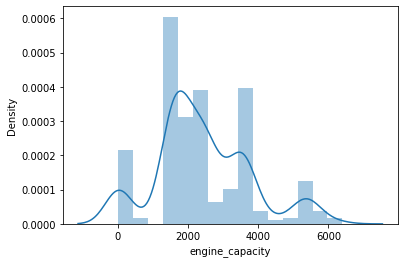

In [116]:
sns.distplot(cars.engine_capacity)

#### The distribution is a little bit skewed so we'll use the median as an imputation for N/A values in engine_capacity

In [117]:
# We need to impute NA values in engine_capacity with the median engine_capacity for each model

nancap = cars[['engine_capacity', 'car_model']]
nancap = (
    nancap
    .set_index('car_model')
    .fillna(
        nancap
            .groupby('car_model')
            .agg(pd.Series.median)
            .to_dict()
    )
    .reset_index()
)

/home/ysotaibi/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ysotaibi/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ysotaibi/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ysotaibi/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ysotaibi/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ysotaibi/.local/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  retur

In [118]:
nancap.loc[nancap['car_model'] == 'Corolla'].isna().sum()

car_model          0
engine_capacity    0
dtype: int64

In [119]:
nancap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5062 entries, 0 to 5061
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   car_model        5062 non-null   object 
 1   engine_capacity  4495 non-null   float64
dtypes: float64(1), object(1)
memory usage: 79.2+ KB


In [120]:
cars['engine_capacity'] = nancap['engine_capacity']

In [121]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5121
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_make          5062 non-null   object 
 1   car_model         5062 non-null   object 
 2   model_year        5062 non-null   int64  
 3   km                5062 non-null   int64  
 4   transmission      5062 non-null   object 
 5   fuel              5062 non-null   object 
 6   color             5062 non-null   object 
 7   no_doors          5062 non-null   float64
 8   engine_capacity   4444 non-null   float64
 9   drive_type        5062 non-null   object 
 10  no_cylinders      5062 non-null   object 
 11  Accident_history  5062 non-null   object 
 12  price             5062 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 553.7+ KB


In [122]:
cars.loc[cars['car_model'] == 'Corolla'].isna().sum()

car_make             0
car_model            0
model_year           0
km                   0
transmission         0
fuel                 0
color                0
no_doors             0
engine_capacity     36
drive_type           0
no_cylinders         0
Accident_history     0
price                0
dtype: int64

In [123]:
cars.to_csv(r'cars_cleaned.csv', index = False, header=True)